## Competition Description

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

### Practice Skills

* Computer vision fundamentals including simple neural networks

* Classification methods such as SVM and K-nearest neighbors

### Acknowledgements 

More details about the dataset, including algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html. The dataset is made available under a Creative Commons Attribution-Share Alike 3.0 license.

## Problem solution

First let's import some necessary libraries to solve this problem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

Let's read and store our train and test data

In [2]:
training_set = pd.read_csv('train.csv')
testing_set = pd.read_csv('test.csv')

So, what does our data set look like?

In [3]:
training_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
print('Pixels vary between {0} and {1}'.format(training_set.drop(['label'],axis=1).min().min(),
                                                     training_set.drop(['label'],axis=1).max().max()))
print('Labels vary between {0} and {1}'.format(training_set['label'].min(),training_set['label'].max()))

Pixels vary between 0 and 255
Labels vary between 0 and 9


**The training set consists of a label of the digit represented by 784 pixels with values varying between 0 and 255, that represent the intensity of the pixel in a gray scale**

The method below helps understand that better

In [6]:
def visualize_number(pixel_array, label=False):
    """
    Creates visualization of number based on pixel array
    
    pixel_array -> 1-D array of 784 pixels with intensity varying from 0 to 255
    label_index -> default False. If True, position 0 is the label of the corresponding digit
    """
    if label:
        # gets the label and adds it to the visualization
        label_value = pixel_array[0]
        pixels = np.array(pixel_array[1:], dtype='uint8')
        plt.title('Label is {}'.format(label_value))
    else:
        pixels = np.array(pixel_array, dtype='uint8')
        
    # 784 1-D pixels are rearranged to a 28x28 grid to be plotted
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

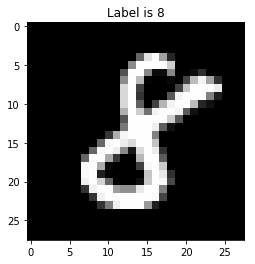

In [7]:
visualize_number(training_set.iloc[random.randint(0,len(training_set))],label=True)

***
Now that we can visualize the numbers, we can look a little further into our database

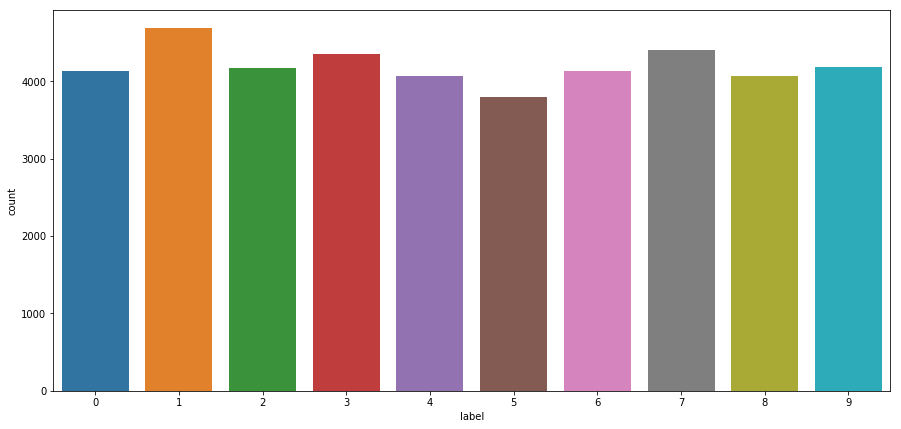

In [8]:
plt.figure(figsize=(15,7))
sns.countplot(training_set['label'])

### Making the data easier to work on
Let's divide our training_set into a train-test set to be able to validade whatever model we develop

In [9]:
training_input = training_set.drop(['label'],axis=1)
training_output = training_set['label']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(training_input, training_output, test_size=0.2, random_state=1)
X_train = X_train/255
X_test = X_test/255

In [17]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

y_train = to_categorical(y_train, num_classes = 10)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
gbc = GradientBoostingClassifier()

In [24]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [32]:
pred = gbc.predict(X_test)

In [33]:
right = 0
wrong = 0

for i in range(len(pred)):
    if pred[i] == y_test.iloc[i]:
        right += 1
    else:
        wrong += 1

In [36]:
right/(right+wrong)*100

94.20238095238095

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(n_estimators=100)

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
pred = rfc.predict(X_test)

In [45]:
right = 0
wrong = 0

for i in range(len(pred)):
    if pred[i] == y_test.iloc[i]:
        right += 1
    else:
        wrong += 1

In [46]:
right/(right+wrong)*100

93.84523809523809